### PROBLEM STATEMENT:
### Winning chances based on their different strategies.

In [1]:
# importing neccessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
# importing dataset
pubg_df=pd.read_csv('./data.csv')

In [3]:
# displays first 2 rows of the dataset
pubg_df.head(2)

,Unnamed: 0,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
0,2093518,a3e3cea9f2e314,c9f6eaa81245b5,a3d8693390584c,0,0,25.93,0,0,0,...,0,0.0,0,0.0,0,0,151.3,1,1525,0.0667
1,3701672,43e4be7ad72cc7,521836de101ee8,b65de9055327e0,0,0,36.71,0,0,0,...,0,0.0,0,0.0,0,0,1918.0,7,1516,0.5862


### An extra column Unnamed was observed while importing dataset. So, we droped it by drop method.

In [4]:
# droping Unnamed column
pubg_df.drop(axis=1,columns=['Unnamed: 0'],inplace =True)
pubg_df.head(2)

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
0,a3e3cea9f2e314,c9f6eaa81245b5,a3d8693390584c,0,0,25.93,0,0,0,84,...,0,0.0,0,0.0,0,0,151.3,1,1525,0.0667
1,43e4be7ad72cc7,521836de101ee8,b65de9055327e0,0,0,36.71,0,0,0,57,...,0,0.0,0,0.0,0,0,1918.0,7,1516,0.5862


In [5]:
# basic information about our dataset
pubg_df.info()     

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1111742 entries, 0 to 1111741
Data columns (total 29 columns):
 #   Column           Non-Null Count    Dtype  
---  ------           --------------    -----  
 0   Id               1111742 non-null  object 
 1   groupId          1111742 non-null  object 
 2   matchId          1111742 non-null  object 
 3   assists          1111742 non-null  int64  
 4   boosts           1111742 non-null  int64  
 5   damageDealt      1111742 non-null  float64
 6   DBNOs            1111742 non-null  int64  
 7   headshotKills    1111742 non-null  int64  
 8   heals            1111742 non-null  int64  
 9   killPlace        1111742 non-null  int64  
 10  killPoints       1111742 non-null  int64  
 11  kills            1111742 non-null  int64  
 12  killStreaks      1111742 non-null  int64  
 13  longestKill      1111742 non-null  float64
 14  matchDuration    1111742 non-null  int64  
 15  matchType        1111742 non-null  object 
 16  maxPlace         1

In [6]:
# checking for null values
pubg_df.isnull().sum()

Id                 0
groupId            0
matchId            0
assists            0
boosts             0
damageDealt        0
DBNOs              0
headshotKills      0
heals              0
killPlace          0
killPoints         0
kills              0
killStreaks        0
longestKill        0
matchDuration      0
matchType          0
maxPlace           0
numGroups          0
rankPoints         0
revives            0
rideDistance       0
roadKills          0
swimDistance       0
teamKills          0
vehicleDestroys    0
walkDistance       0
weaponsAcquired    0
winPoints          0
winPlacePerc       1
dtype: int64

### We observed only got one missing value, which doesn't make any significant difference so we just simply drop it.

In [7]:
pubg_df.dropna(inplace=True)

In [8]:
pubg_df.describe().T

,count,mean,std,min,25%,50%,75%,max
assists,1111741.0,0.233674,0.589403,0.0,0.0,0.0000,0.0000,17.0
boosts,1111741.0,1.106656,1.716051,0.0,0.0,0.0000,2.0000,24.0
damageDealt,1111741.0,130.736525,171.175570,0.0,0.0,84.1100,185.9000,5990.0
DBNOs,1111741.0,0.657362,1.146023,0.0,0.0,0.0000,1.0000,35.0
headshotKills,1111741.0,0.226649,0.603336,0.0,0.0,0.0000,0.0000,64.0
heals,1111741.0,1.370349,2.683820,0.0,0.0,0.0000,2.0000,73.0
killPlace,1111741.0,47.595664,27.470224,1.0,24.0,47.0000,71.0000,100.0
killPoints,1111741.0,504.430571,627.400716,0.0,0.0,0.0000,1171.0000,2170.0
kills,1111741.0,0.925511,1.562216,0.0,0.0,0.0000,1.0000,72.0
killStreaks,1111741.0,0.544851,0.712903,0.0,0.0,0.0000,1.0000,20.0


### Mean for most of the columns is below one. And match_duration has highest mean. 

### Univariate Analysis:

### Assists:

In [9]:
pubg_df['assists'].value_counts()

0     917130
1     147785
2      34274
3       8887
4       2491
5        710
6        249
7         97
8         55
9         25
10        14
11         9
13         6
12         5
15         3
17         1
Name: assists, dtype: int64

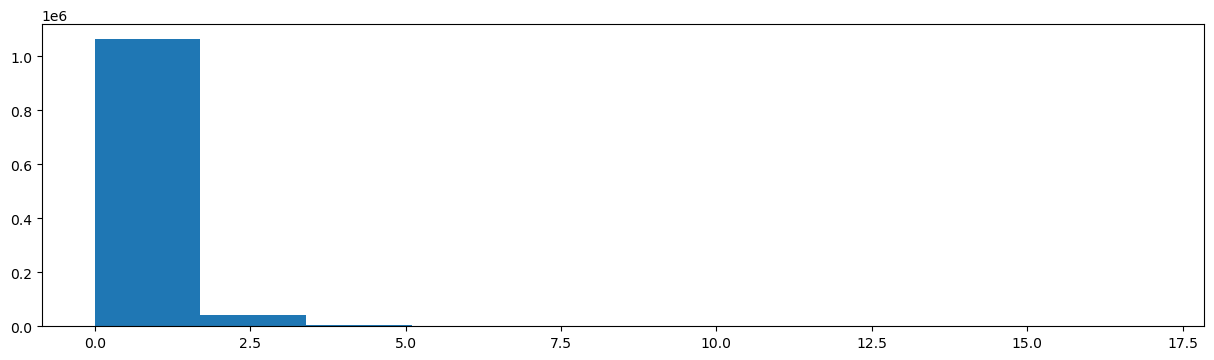

In [10]:
plt.figure(figsize=(15,4),dpi=100)
plt.hist(pubg_df['assists']);

### It is right skewed as we can see that most of the players have zero assists.

### Boosts:

In [11]:
pubg_df['boosts'].value_counts()

0     630340
1     170364
2     122432
3      74139
4      48835
5      30098
6      17627
7       9295
8       4706
9       2096
10      1043
11       437
12       178
13        83
14        28
15        18
16        10
17         4
18         3
21         2
19         1
20         1
24         1
Name: boosts, dtype: int64

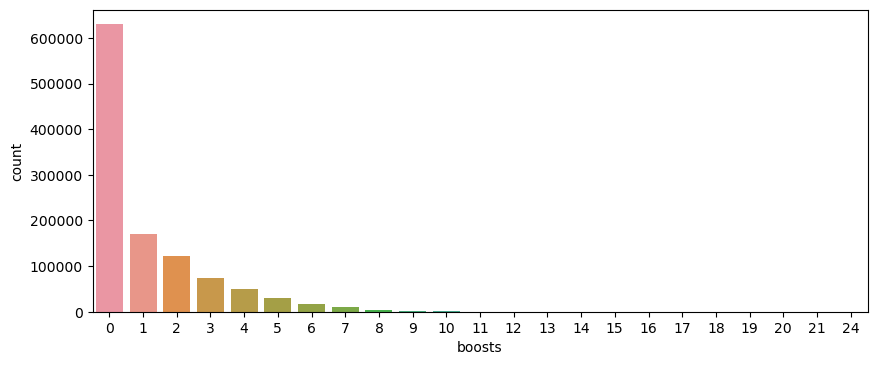

In [12]:
plt.figure(figsize=(10,4),dpi=100)
sns.countplot(pubg_df['boosts']);

### Most of the players not used any boosts in playing the game.

### Damage_dealt:

In [13]:
pubg_df['damageDealt'].value_counts()

0.0000      309420
100.0000     65693
200.0000     15555
300.0000      3491
75.0000       3221
             ...  
4.5240           1
5.6040           1
3.8350           1
0.7035           1
6.1430           1
Name: damageDealt, Length: 23831, dtype: int64

<AxesSubplot:xlabel='damageDealt', ylabel='Density'>

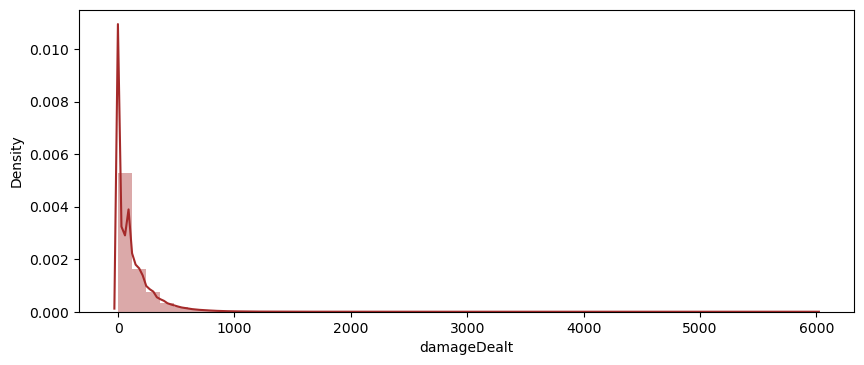

In [14]:
plt.figure(figsize=(10,4),dpi=100)
sns.distplot(pubg_df['damageDealt'],hist=True,kde=True,rug=False,color='brown')

### Most players not suffered any damages.

### Match_types:

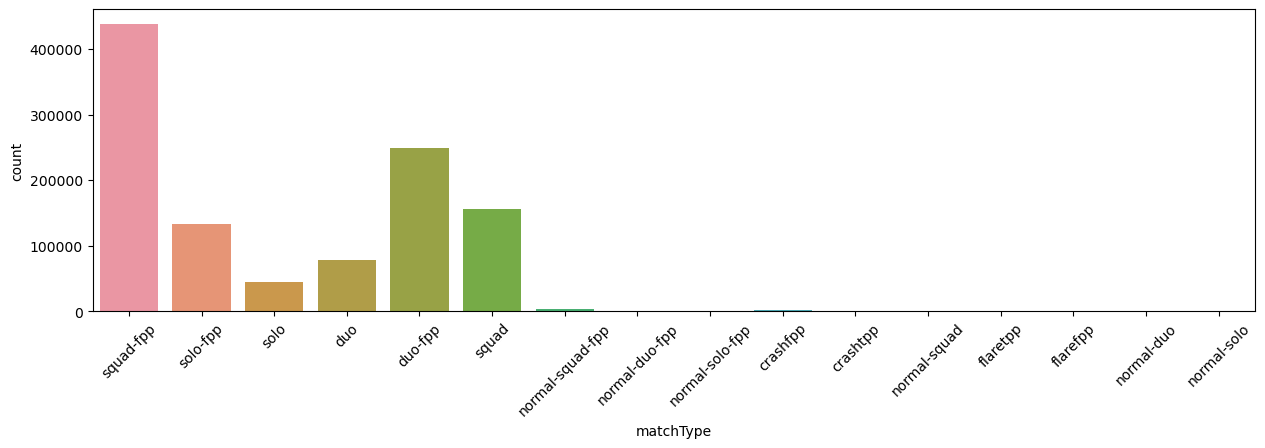

In [15]:
plt.figure(figsize=(15,4),dpi=100)
plt.xticks(rotation=45)
sns.countplot(pubg_df['matchType']);

### It seems most of the players play as squads(i.e.,4 members).

### Kills:

In [16]:
pubg_df['kills'].value_counts()

0     632148
1     232156
2     118274
3      58026
4      31302
5      16600
6       9429
7       5458
8       3139
9       1934
10      1131
11       713
12       451
13       283
14       199
15       126
16        78
17        61
18        53
19        29
21        27
20        24
22        22
23        17
24        11
26         9
30         5
33         3
27         3
40         3
38         3
25         3
36         2
39         2
37         2
29         2
47         1
50         1
42         1
53         1
55         1
44         1
56         1
41         1
35         1
34         1
32         1
28         1
72         1
Name: kills, dtype: int64

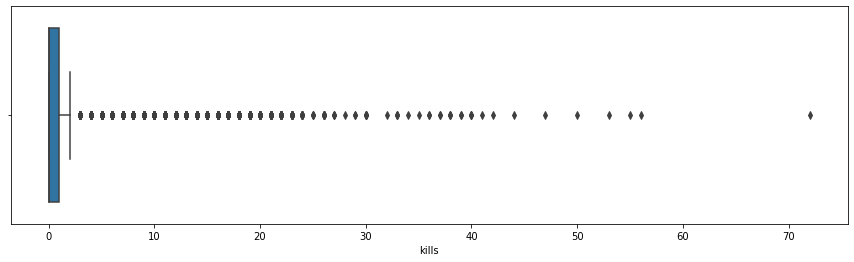

In [17]:
plt.figure(figsize=(15,4))
sns.boxplot(pubg_df['kills']);

### Most of players haven't killed anyone. It's mean is below 1.

### Heals:

In [18]:
pubg_df['heals'].value_counts()

0     662250
1     168295
2      79695
3      50617
4      35473
5      33786
6      21957
7      16036
8      10922
9       7491
10      6406
11      4705
12      3372
13      2399
14      1864
15      1531
16      1144
17       845
18       607
19       475
20       405
21       302
22       254
23       168
25       126
24       122
26       100
27        77
28        63
29        42
31        37
30        31
32        23
33        20
35        15
34        13
37        11
38         9
39         9
40         7
36         7
45         4
48         4
49         4
44         3
47         3
42         2
43         2
59         2
54         1
62         1
63         1
52         1
41         1
73         1
Name: heals, dtype: int64

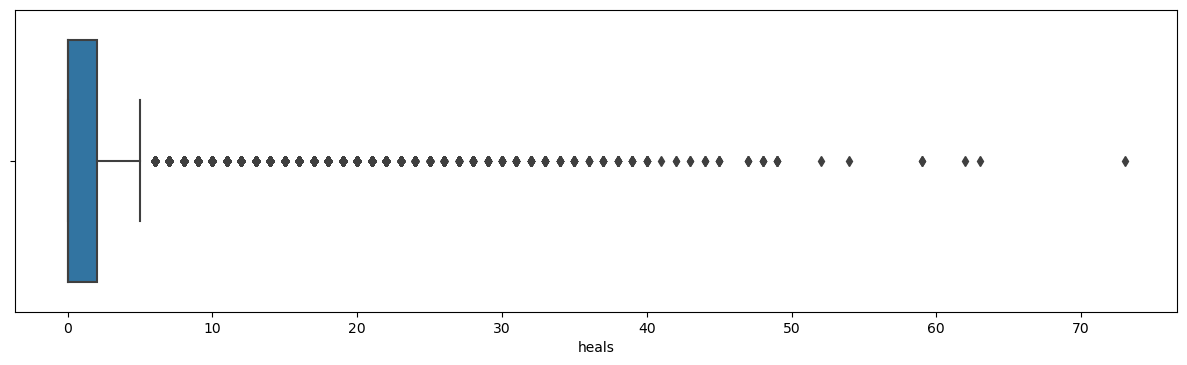

In [19]:
plt.figure(figsize=(15,4),dpi=100)
sns.boxplot(pubg_df['heals']);

### Most of the players not used any heals.  Also we observed that no. of kills and heals are relatively similar to eachother by which we can say that most players haven't sustained any damages.

In [20]:
pubg_df['matchDuration'].value_counts()

1384    6941
1374    6849
1376    6722
1381    6610
1377    6583
        ... 
1052       1
826        1
530        1
938        1
314        1
Name: matchDuration, Length: 1262, dtype: int64

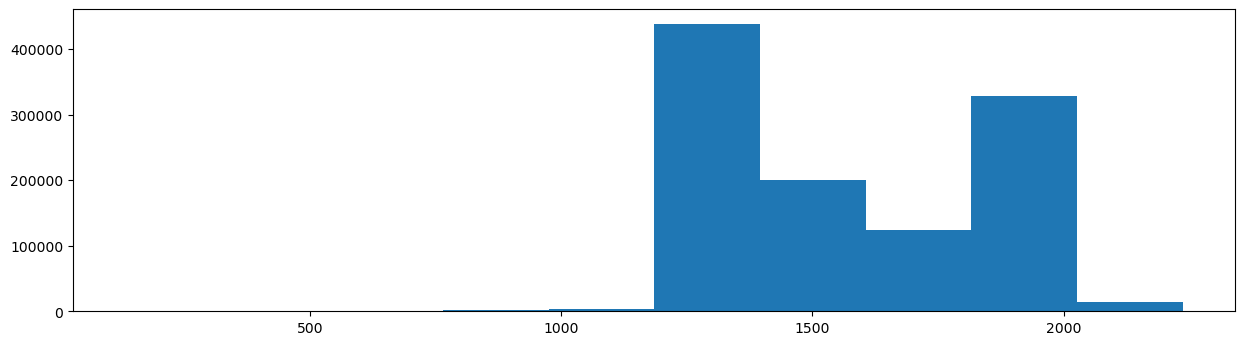

In [21]:
plt.figure(figsize=(15,4),dpi=100)
#sns.countplot(pubg_df['matchDuration']);
plt.hist(pubg_df['matchDuration']);

### Most of the players survived above 1000 seconds during the match.

### Bivariate Analysis:

### Walkdistance and winning

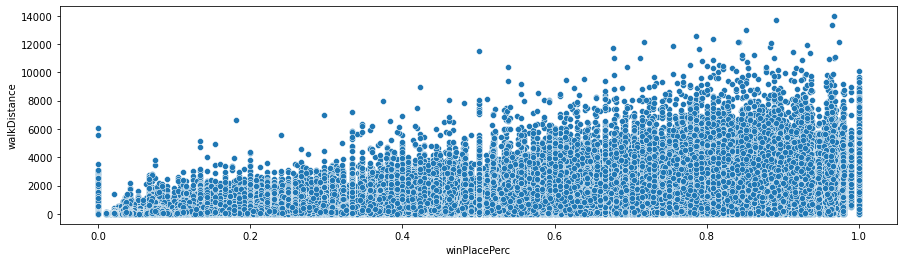

In [22]:
plt.figure(figsize=(15,4))
sns.scatterplot(x='winPlacePerc',y='walkDistance',data=pubg_df);

### Vechicles and Winning

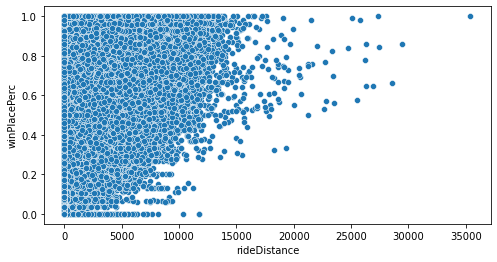

In [23]:
plt.figure(figsize=(8,4))
sns.scatterplot(data=pubg_df,x='rideDistance',y='winPlacePerc')
plt.show()

### WeaponsAcquired and Winning

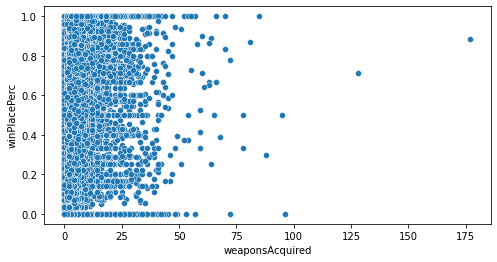

In [24]:
plt.figure(figsize=(8,4))
sns.scatterplot(data=pubg_df,x='weaponsAcquired',y='winPlacePerc')
plt.show()

### Walkdistance, Vehciles and weapons are positively correlated and they help in increasing winning(i.e., high chances)

In [25]:
pubg_df.corr()

,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,killPoints,kills,killStreaks,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
assists,1.000000,0.306582,0.409369,0.302200,0.199487,0.228456,-0.289985,0.038331,0.322067,0.243386,...,0.197938,0.110496,0.012366,0.022871,0.007775,0.058241,0.288579,0.244594,0.023340,0.297738
boosts,0.306582,1.000000,0.519600,0.357902,0.331536,0.535387,-0.554047,0.008992,0.499478,0.403484,...,0.254125,0.329281,0.033775,0.107880,0.014645,0.085997,0.639361,0.405301,-0.006973,0.633482
damageDealt,0.409369,0.519600,1.000000,0.735084,0.613306,0.341620,-0.676136,0.050217,0.889038,0.703222,...,0.256318,0.139840,0.050660,0.037509,0.016209,0.079900,0.396620,0.354514,0.017989,0.438973
DBNOs,0.302200,0.357902,0.735084,1.000000,0.467393,0.265348,-0.554860,0.042138,0.706211,0.646344,...,0.301098,0.101882,0.035705,0.018726,0.071295,0.059857,0.284050,0.217667,0.010482,0.279322
headshotKills,0.199487,0.331536,0.613306,0.467393,1.000000,0.197936,-0.468080,0.024202,0.673739,0.513207,...,0.149131,0.076274,0.011974,0.029987,0.009198,0.039857,0.249591,0.215612,0.005029,0.276170
heals,0.228456,0.535387,0.341620,0.265348,0.197936,1.000000,-0.385498,-0.001991,0.310537,0.268948,...,0.236400,0.297734,0.023416,0.080991,0.035847,0.062720,0.429283,0.308228,-0.010303,0.427296
killPlace,-0.289985,-0.554047,-0.676136,-0.554860,-0.468080,-0.385498,1.000000,-0.023595,-0.728968,-0.809671,...,-0.270057,-0.236372,-0.057496,-0.089924,-0.039589,-0.072698,-0.590132,-0.489745,-0.002612,-0.719051
killPoints,0.038331,0.008992,0.050217,0.042138,0.024202,-0.001991,-0.023595,1.000000,0.036511,0.037883,...,0.012730,-0.027882,-0.004503,-0.005820,-0.039932,-0.009321,0.004882,-0.004247,0.983443,0.013089
kills,0.322067,0.499478,0.889038,0.706211,0.673739,0.310537,-0.728968,0.036511,1.000000,0.802054,...,0.253222,0.114664,0.061824,0.039986,0.019248,0.078644,0.373495,0.338190,0.007204,0.418527
killStreaks,0.243386,0.403484,0.703222,0.646344,0.513207,0.268948,-0.809671,0.037883,0.802054,1.000000,...,0.241888,0.098000,0.065413,0.034264,0.030051,0.062696,0.326997,0.275110,0.009181,0.376840


<AxesSubplot:title={'center':'HeatMap of Correlation'}>

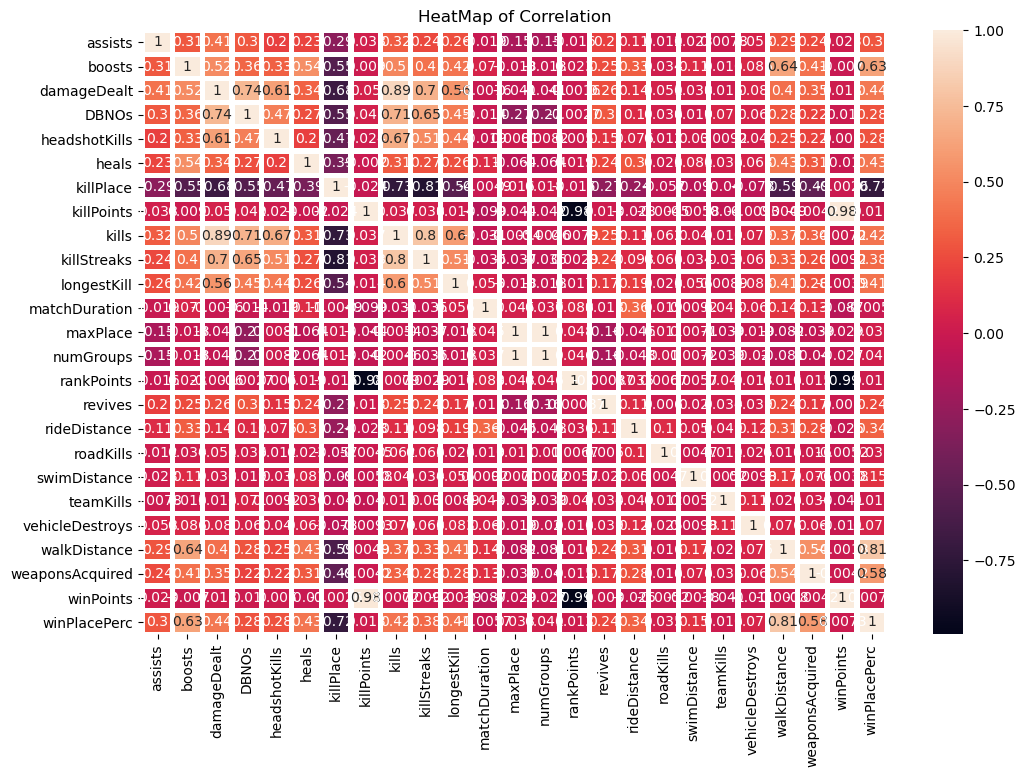

In [26]:
plt.figure(figsize=(12,8),dpi=100)
plt.title('HeatMap of Correlation')
sns.heatmap(pubg_df.corr(),linecolor='white',linewidth=3,annot=True)

### Conclusion:
### 1.Number of kills and heals used doesn't impact winning chances.
### 2.Survival gives chances of winning.
### 2.More you walk more chances of winning.
### 3.Using Weapons, vehciles increase winning chances.
### 4.Playing in Teams can give high chances of winning.